In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objs as go
from plotly.offline import iplot

In [2]:
#df_yelp = pd.read_csv("CleanedYelpData.csv").reset_index(drop = True)
df_yelp = pd.read_csv("yelp_new.csv").reset_index(drop = True)

In [4]:
df_yelp = df_yelp[df_yelp['state'].isin(['QC', 'NV', 'ON', 'WI', 'NC', 'OH', 'PA', 'EDH', 'MLN', 'BW', 'FL',
       'KHL', 'GLG', 'NTH', 'TAM', 'XGL', 'AB', 'FIF', 'WA', 'NE', 'SCB',
       'MT', 'AZ', 'ZET', 'CA', 'GA', 'SC'])]

In [5]:
df_yelp = df_yelp.dropna(axis = 0, how = 'any')

In [6]:
df_yelp['date'] = pd.to_datetime(df_yelp['date'])

In [ ]:
#df_yelp = df_yelp.head(n = 1000000)

In [26]:
df_cat = pd.read_csv("Yelp_withcategories.csv")

In [27]:
df_cat.shape

(1000000, 29)

## Number of reviews by unique business

In [8]:
busi = df_yelp['review_rating'].groupby(df_yelp['name']).count()
print("Number of Unique Business = {}".format(busi.count()))

Number of Unique Business = 52119


In [9]:
sorted_busi = busi.sort_values(ascending=False)

print("Top 20 Reviewed Business:\n")
print(sorted_busi[:20], end='\n\n')
#print('Most Reviewed Product, B001HBHNHE - has {} reviews.'.format(products.max()))

Top 20 Reviewed Business:

name
"Hash House A Go Go"                  3313
"Starbucks"                           3284
"Mon Ami Gabi"                        2812
"Bacchanal Buffet"                    2699
"Wicked Spoon"                        2346
"Gordon Ramsay BurGR"                 2065
"Earl of Sandwich"                    1961
"Bachi Burger"                        1688
"Lotus of Siam"                       1541
"The Buffet"                          1521
"ARIA Resort & Casino"                1511
"Serendipity 3"                       1476
"The Cosmopolitan of Las Vegas"       1476
"Tacos El Gordo"                      1472
"Secret Pizza"                        1462
"The Buffet at Bellagio"              1441
"Egg Works"                           1388
"McDonald's"                          1369
"Luxor Hotel and Casino Las Vegas"    1365
"MGM Grand Hotel"                     1360
Name: review_rating, dtype: int64



In [10]:
sorted_busi.shape

(52119,)

## Bottom 20 reviewed products

In [12]:
print("Bottom 20 Reviewed Business:\n")
print(sorted_busi[52119-20:], end='\n\n')

Bottom 20 Reviewed Business:

name
"Dizzy on Yonge"                           1
"Rocky Rococo Pan Style Pizza - Monona"    1
"Diyor Cafe and Lounge"                    1
"Divinity Salon"                           1
"The Sculpture Center"                     1
"Rockwood Nightclub"                       1
"The Sentry Models and Hobbies"            1
"Diversions Scuba"                         1
"Nomad World Pub"                          1
"Distinct Hair Design"                     1
"The Sewing Studio"                        1
"Divas Lace Wigs"                          1
"Nomtrition"                               1
"Non Solo Pane"                            1
"District Vidéo Lounge"                    1
"District Cleaners"                        1
"District 5 Interiors"                     1
"Distributel Communications"               1
"The Shoe Room"                            1
"Les Aliments Felix Mish"                  1
Name: review_rating, dtype: int64



## No. of reviews by review rating

/usr/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



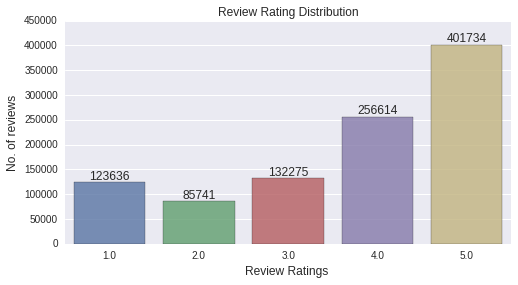

In [13]:
#Get the distribution of the ratings
x = df_yelp['review_rating'].value_counts()
x = x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Review Rating Distribution")
plt.ylabel('No. of reviews', fontsize=12)
plt.xlabel('Review Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

## Popular business categories

/usr/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



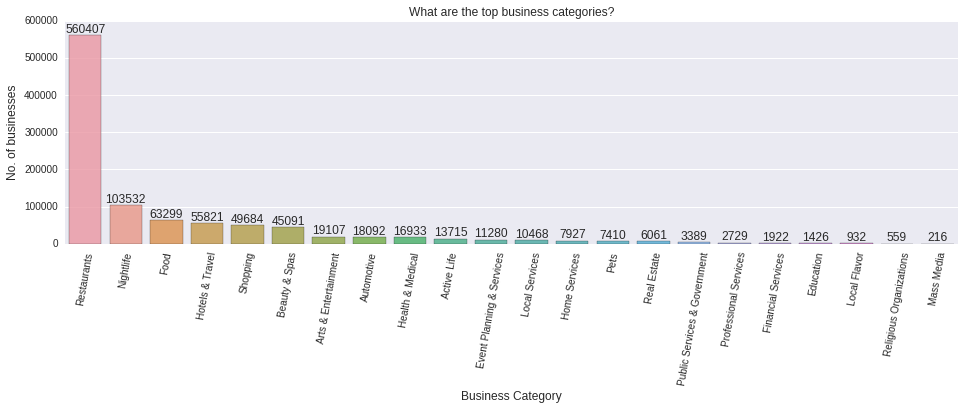

In [28]:
# What are the popular business categories?
#business_cats=' '.join(df_yelp['categories'])

#cats = pd.DataFrame(business_cats.split(';'),columns=['category'])
x = df_cat.cat_max.value_counts()
x = x.sort_values(ascending=False)
#x = cats.category.value_counts()

#prep for chart
#x = x.sort_values(ascending=False)
#x = x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top business categories?",fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('No. of businesses', fontsize=12)
plt.xlabel('Business Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

## No. of reviews by cities

/usr/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



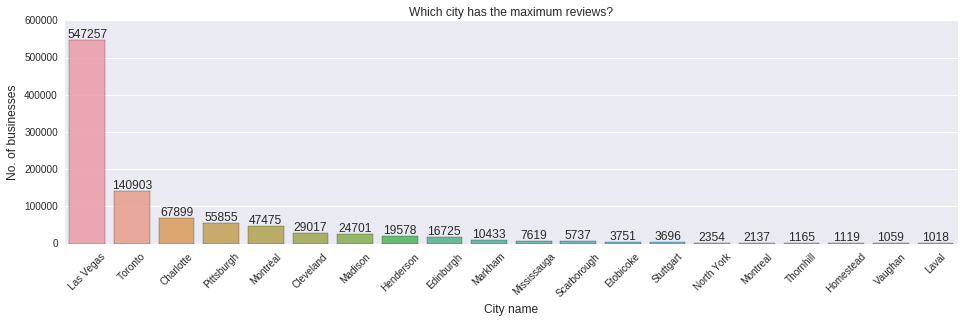

In [15]:
#Get the distribution of the ratings
x = df_yelp['city'].value_counts()
x = x.sort_values(ascending=False)
x = x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)#, color=color[3])
plt.title("Which city has the maximum reviews?", fontsize = 12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('No. of businesses', fontsize=12)
plt.xlabel('City name', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()


## How many reviews are positive v/s negative

In [16]:
df_yelp['Positivity'] = np.where(df_yelp['review_rating'] > 3, 1, 0)

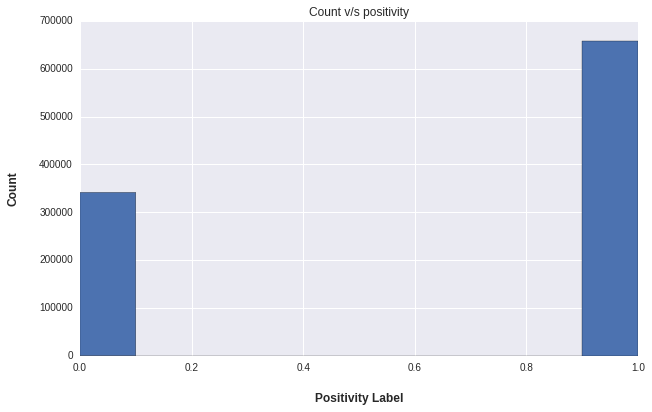

In [17]:
ax = df_yelp.hist(column = 'Positivity', figsize=(10,6))
ax = ax[0]
for x in ax:
    x.set_title("Count v/s positivity")
    x.set_xlabel("Positivity Label", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

## Top 10 users in Yelp

In [18]:
user_agg = df_yelp.groupby('user_id').agg({'review_id':['count'],
                                           'date':['min','max']})

user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
user_agg.head(10)

date            review_id
                              min        max     count
user_id                                               
CxDOIDnH8gp9KXzpBHJYXw 2009-11-09 2017-12-04       851
bLbSNkLggFnqwNNzzq-Ijw 2012-05-20 2017-12-10       612
PKEzKWv_FktMm2mGPjwd0Q 2010-01-11 2017-12-04       506
UYcmGbelzRa0Q6JqzLoguw 2010-12-03 2017-12-09       340
U4INQZOPSUaj8hMjLlZ3KA 2008-05-13 2017-12-09       303
N3oNEwh0qgPqPP3Em6wJXw 2011-01-30 2017-12-09       299
n86B7IkbU20AkxlFX_5aew 2010-02-20 2017-08-30       286
Wc5L6iuvSNF5WGBlqIO8nw 2011-07-30 2017-11-28       283
qewG3X2O4X6JKskxyyqFwQ 2010-01-09 2015-06-19       272
0BBUmH7Krcax1RZgbH4fSA 2010-03-18 2017-03-08       263

## Word cloud from reviews

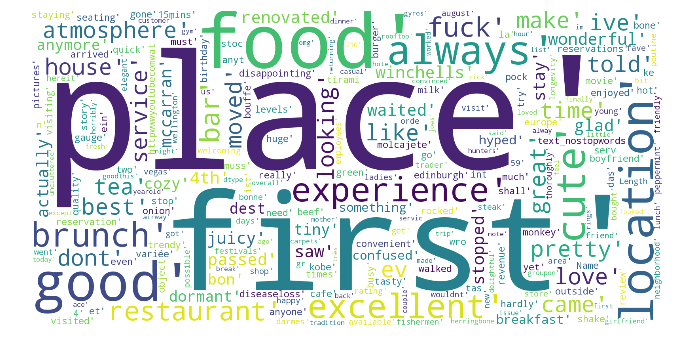

In [11]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using df_yelp_tip_top['text_clear']
wc.generate(str(df_yelp['text_nostopwords']))
# declare our figure 
plt.figure(figsize = (16,8))#, color = 'white') #facecolor='k')

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 10)
# after lot of congiguration finally plot the graph
plt.show()

In [20]:
df_yelp.to_csv("yelp_new.csv", index = False)